In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
d = pd.read_csv('songz.csv')

In [3]:
d = d.dropna()

In [4]:
## we have mapped 0 to relaxed, 1 to angry, 2 to happy, and 3 to sad

In [5]:
def standardize(train, test):

    mean_train = np.mean(train, axis=0)
    std_train = np.std(train, axis=0)+0.000001
    mean_test = np.mean(test, axis=0)
    std_test = np.std(test, axis=0)+0.000001
    X_train = (train - mean_train) / std_train
    X_test = (test - mean_test) /std_test
    return X_train, X_test

In [6]:
from sklearn.utils import shuffle
X = d.loc[:, ['title','artist','val','dB','bpm', 'nrgy', 'dnce']]
y = d[['mood']]


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X.loc[:,'title'] = le.fit_transform(X.loc[:,'title'])

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le2 = LabelEncoder()
X.loc[:,'artist'] = le2.fit_transform(X.loc[:,'artist'])

In [9]:
#X['title'] =([int(a) for a in ['title']])

In [10]:
X = np.array(X)
X, y = shuffle(X, y)

In [11]:
X_test = X[1200:]
y_test = y[1200:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)
# X_test,_ = standardize(X_test, [0])
# y_test, _ = standardize(y_test, [0])
from keras.utils import np_utils
from keras.utils import normalize
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_test = np_utils.to_categorical(encoded_Y)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
X_train = X[0:900]
Y_train = y[0:900]
X_val = X[900:1200]
Y_val = y[900:1200]

In [13]:
# X_train, X_val = standardize(X_train, X_val)
# Y_train, Y_val = standardize(Y_train,Y_val)
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
Y_train= scaler.fit_transform(Y_train)
Y_val = scaler.fit_transform(Y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
from keras.utils import np_utils
from keras.utils import normalize
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)

Y_train =  np_utils.to_categorical(encoded_Y)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from keras.utils import np_utils
from keras.utils import normalize
encoder = LabelEncoder()
encoder.fit(Y_val)
encoded_Y = encoder.transform(Y_val)
Y_val = np_utils.to_categorical(encoded_Y)

In [16]:
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adam, SGD

model = Sequential()

# model.add(Dense(64, input_shape=(7,), activation='relu'))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.001))
# model.add(Dropout(0.4))
model.add(Dense(48, activation='relu', input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(24))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(12))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(6))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))
# #model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Dense(4, activation='sigmoid', name='output'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                384       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48)                192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1176      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24)                96        
_________________________________________________________________
dropout_2 (Dropout)  

In [17]:
# Adam optimizer with learning rate of 0.001
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
optimizer = Adam(lr=0.001)
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-10, decay=0)
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer = 'adam' , loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
hist = model.fit(X_train, Y_train, verbose=2, batch_size=128, epochs=50, validation_data=(X_val,Y_val),callbacks=[es, mc])

Instructions for updating:
Use tf.cast instead.
Train on 900 samples, validate on 300 samples
Epoch 1/50
 - 2s - loss: 0.8756 - acc: 0.4889 - val_loss: 0.7349 - val_acc: 0.5200

Epoch 00001: val_acc improved from -inf to 0.52000, saving model to best_model.h5
Epoch 2/50
 - 0s - loss: 0.8237 - acc: 0.5106 - val_loss: 0.7266 - val_acc: 0.5233

Epoch 00002: val_acc improved from 0.52000 to 0.52333, saving model to best_model.h5
Epoch 3/50
 - 0s - loss: 0.8236 - acc: 0.5094 - val_loss: 0.7234 - val_acc: 0.5158

Epoch 00003: val_acc did not improve from 0.52333
Epoch 4/50
 - 0s - loss: 0.8040 - acc: 0.5122 - val_loss: 0.7154 - val_acc: 0.5175

Epoch 00004: val_acc did not improve from 0.52333
Epoch 5/50
 - 0s - loss: 0.7810 - acc: 0.5300 - val_loss: 0.7027 - val_acc: 0.5350

Epoch 00005: val_acc improved from 0.52333 to 0.53500, saving model to best_model.h5
Epoch 6/50
 - 0s - loss: 0.7647 - acc: 0.5314 - val_loss: 0.6939 - val_acc: 0.5500

Epoch 00006: val_acc improved from 0.53500 to 0.55


Epoch 00050: val_acc improved from 0.74500 to 0.74750, saving model to best_model.h5


In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [19]:
scores

[0.5645008505574914, 0.7483443700714617]

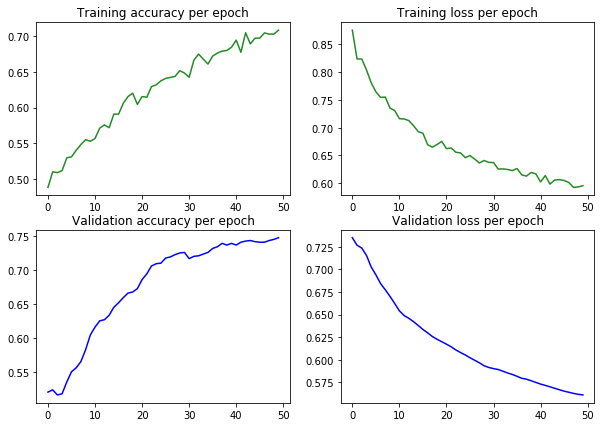

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,7))

# Training accuracy
plt.subplot(221)
plt.plot(range(0,50), hist.history['acc'], c = 'forestgreen');
plt.title('Training accuracy per epoch');

# Training loss #
plt.subplot(222)
plt.plot(range(0,50), hist.history['loss'], c = 'forestgreen');
plt.title('Training loss per epoch');

# Validation accuracy #
plt.subplot(223)
plt.plot(range(0,50), hist.history['val_acc'], c = 'blue');
plt.title('Validation accuracy per epoch');

# Validation loss #
plt.subplot(224)
plt.plot(range(0,50), hist.history['val_loss'], c = 'blue');
plt.title('Validation loss per epoch');

In [21]:
import pickle
filename = 'song_NN.pickle'

pickle_out = open(filename, 'wb')

pickle.dump(model, pickle_out)
pickle_out.close()

In [22]:
pickle_in = open("song_NN.pickle","rb")
example_dict = pickle.load(pickle_in)
y_pred = example_dict.predict(X_test)

In [24]:
arr = []
for i in y_pred:
    yvals = np.where(i == np.amax(i))
    arr.append(yvals)

In [25]:
array = []
for i in arr:
    array.append(i[0][0])

In [26]:
fin_arr = np.array(array)

In [29]:
acc = 0
for i in y[1200:].values:
    for j in fin_arr:
        if i == j:
            acc += 1

In [30]:
acc/len(y_pred)

89.83112582781457